# 1. Telecom Case Study 

## Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

## Business Objective
The dataset contains customer-level information for a span of four consecutive months - June, July, August & September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Analysis Process
The analysis is divided into nine main parts:

- Data Sourcing or Data Understanding
- Data cleaning and Derived Metrics
- Exploratory Data Analysis (Univariate, Bivariate Analysis)
- Model Preparation
- Train and Test Data Split
- Data Normalization
- Handling Class Imbalance
- Model Building
- Residual Analysis of the Train Data
- Making Predictions
- Model Evaluation
- Final Inference

# 2. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

# 3. Importing the dataset

In [2]:
data= pd.read_csv('telecom_churn_data.csv',skipinitialspace=True)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Finding the shape of the dataset
data.shape

(99999, 226)

* The shape of the data set is of = (99999,226).
* It has 99999 rows and 226 Columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Check the percentage of missing values in each column
(data.isnull().sum().sort_values(ascending= False)/len(data))*100

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

In [6]:
col= ((data.isnull().sum()/len(data))*100)>0
col.sum()

166

* We see that there are 166 columns which has null values. Hence we have to treat them either by dropping the columns or replacing it with adequate value.

Now from the above percentages we see that there are a few columns which have more than 70% of data missing. We can drop these columns as they would convey a very little information (We will understand more on this in a later part.

But a very important point to consider here is that we have to define high-value customers as - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

So we have to take care of these columns so that we do not drop the columns related to the recharge amounts. Thus to avoid doing that first we have to deal with the missing values in these columns -

- total_rech_data_6 - 74.8467 % missing values
- total_rech_data_7 - 74.4287 % missing values
- av_rech_amt_data_6 - 74.8467 % missing values
- av_rech_amt_data_7 - 74.4287 % missing values

We have 2 more columns as -

- date_of_last_rech_data_6 - 74.8467 % missing values
- date_of_last_rech_data_7 - 74.4287 % missing values


Lets see how we can impute the missing values in the above mentioned columns now -

In [7]:
total_rech_data_6_index= data['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index= data['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0. Also as the total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column as well.

In [8]:
data['total_rech_data_6'].fillna(0,inplace=True)
data['av_rech_amt_data_6'].fillna(0,inplace=True)

We will follow the same logic for **'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8'** columns as well.

In [9]:
total_rech_data_7_index= data['total_rech_data_7'].isnull()
total_rech_data_8_index= data['total_rech_data_8'].isnull()
total_rech_data_9_index= data['total_rech_data_9'].isnull()

date_of_last_rech_data_7_index= data['date_of_last_rech_data_7'].isnull()
date_of_last_rech_data_8_index= data['date_of_last_rech_data_8'].isnull()
date_of_last_rech_data_9_index= data['date_of_last_rech_data_9'].isnull()

In [10]:
if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [11]:
if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


In [12]:
if total_rech_data_9_index.equals(date_of_last_rech_data_9_index):
    print('The indexes for NULL values for month 9 are equal')

The indexes for NULL values for month 9 are equal


In [13]:
data['total_rech_data_7'].fillna(0,inplace=True)
data['av_rech_amt_data_7'].fillna(0,inplace=True)
data['total_rech_data_8'].fillna(0,inplace=True)
data['av_rech_amt_data_8'].fillna(0,inplace=True)
data['total_rech_data_9'].fillna(0,inplace=True)
data['av_rech_amt_data_9'].fillna(0,inplace=True)

In [14]:
(data.isnull().sum()/len(data))*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [15]:
more_than_70= ((data.isnull().sum()/len(data))*100)>=70

In [16]:
more_than_70.sum()

32

In [17]:
data['total_rech_data_6'].unique()

array([ 1.,  0.,  3.,  5.,  4.,  2.,  6.,  8.,  7., 12., 16., 11., 10.,
       14., 20.,  9., 18., 29., 23., 15., 22., 27., 17., 21., 13., 19.,
       35., 25., 33., 61., 55., 24., 26., 28., 40., 32., 46., 34.])

# 4. Data Preparation

### 1. New Features

In [18]:
data['total_data_rech_amt_6']= data['total_rech_data_6']*data['av_rech_amt_data_6']
data['total_data_rech_amt_7']= data['total_rech_data_7']*data['av_rech_amt_data_7']
data['total_data_rech_amt_8']= data['total_rech_data_8']*data['av_rech_amt_data_8']
data['total_data_rech_amt_9']= data['total_rech_data_9']*data['av_rech_amt_data_9']

### 2. Filter high value customers

We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [19]:
high_value= data[['total_rech_amt_6','total_data_rech_amt_6','total_rech_amt_7','total_data_rech_amt_7']].mean(axis=1)
amt_70= np.percentile(high_value,70)

print("The 70th percentile of the average recharge amount is:", amt_70)

The 70th percentile of the average recharge amount is: 239.0


In [20]:
data= data[high_value>=amt_70]

In [21]:
data.shape

(30001, 230)

In [22]:
# Reset the dataframe indexes

data = data.reset_index(drop=True)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,

### 3. Rename the Columns

In [23]:
# Rename month named vbc columns to format 6,7,8 and 9

data.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

### 4. Tag churners and remove attributes of the churn phase

Now to tag churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9
We will create a temporary dataset that stores all the parameters/features related to the tagging a customer as churn. We will use the above attributes mentioned.

In [24]:
churn_parameters_data = data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head(10)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74
5,114.16,1.70,30.92,5588.11
6,114.09,708.04,0.00,0.00
7,165.84,89.13,0.00,0.00
8,894.81,2319.01,0.00,0.00
9,680.61,503.06,0.82,0.00


In [25]:
data['churn']= data.apply(lambda x:1 if ((x.total_ic_mou_9==0)&
                                         (x.total_og_mou_9==0)and
                                         (x.vol_2g_mb_9==0)and
                                         (x.vol_3g_mb_9==0)) else 0, axis=1)

In [26]:
data['churn'].head(10)

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: churn, dtype: int64

In [27]:
# We will try to get all the columns in the 'telecom_data' dataset where the column have '_9' in the name.
col_with_9= [col for col in data.columns if '_9' in col]
col_with_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [28]:
len(col_with_9)

56

In [29]:
data.drop(col_with_9,axis=1,inplace=True)

In [30]:
data.shape

(30001, 175)

So after dropping all the last month columns, we are left with 175 columns.

# 5. Data Cleaning & Missing Values Treatment

In [31]:
(data.isnull().sum().sort_values(ascending=False)/len(data))*100

fb_user_8                   46.825106
count_rech_3g_8             46.825106
arpu_2g_8                   46.825106
count_rech_2g_8             46.825106
date_of_last_rech_data_8    46.825106
max_rech_data_8             46.825106
arpu_3g_8                   46.825106
night_pck_user_8            46.825106
arpu_2g_6                   44.148528
date_of_last_rech_data_6    44.148528
night_pck_user_6            44.148528
arpu_3g_6                   44.148528
max_rech_data_6             44.148528
count_rech_2g_6             44.148528
fb_user_6                   44.148528
count_rech_3g_6             44.148528
date_of_last_rech_data_7    43.145228
night_pck_user_7            43.145228
fb_user_7                   43.145228
max_rech_data_7             43.145228
arpu_3g_7                   43.145228
arpu_2g_7                   43.145228
count_rech_3g_7             43.145228
count_rech_2g_7             43.145228
loc_ic_t2f_mou_8             3.913203
isd_og_mou_8                 3.913203
std_og_t2f_m

In [32]:
above_40= ((data.isnull().sum().sort_values(ascending=False)/len(data))*100)>=40
above_40.sum()

24

In [33]:
col_name_with_40_missing_value= above_40[above_40>0.40].index
col_name_with_40_missing_value

Index(['fb_user_8', 'count_rech_3g_8', 'arpu_2g_8', 'count_rech_2g_8',
       'date_of_last_rech_data_8', 'max_rech_data_8', 'arpu_3g_8',
       'night_pck_user_8', 'arpu_2g_6', 'date_of_last_rech_data_6',
       'night_pck_user_6', 'arpu_3g_6', 'max_rech_data_6', 'count_rech_2g_6',
       'fb_user_6', 'count_rech_3g_6', 'date_of_last_rech_data_7',
       'night_pck_user_7', 'fb_user_7', 'max_rech_data_7', 'arpu_3g_7',
       'arpu_2g_7', 'count_rech_3g_7', 'count_rech_2g_7'],
      dtype='object')

### Now lets examine the above columns (with >40% missing values) one by one -
**1.'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'**

For the columns which have date values missing, we cannot impute any date arbitrarily. Also with almost 50% of date values not present for these columns we can safely drop these columns.

In [34]:
data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

In [35]:
print("Column info for max_rech_data_6")
print("-------------------------------")
print(data.max_rech_data_6.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_6 columns is - ", data.max_rech_data_6.isnull().sum())

Column info for max_rech_data_6
-------------------------------
count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_6 columns is -  13245


In [36]:
print("Column info for max_rech_data_7")
print("-------------------------------")
print(data.max_rech_data_7.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_7 columns is - ", data.max_rech_data_7.isnull().sum())

Column info for max_rech_data_7
-------------------------------
count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_7 columns is -  12944


In [37]:
print("Column info for max_rech_data_8")
print("-------------------------------")
print(data.max_rech_data_8.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_8 columns is - ", data.max_rech_data_8.isnull().sum())

Column info for max_rech_data_8
-------------------------------
count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_8 columns is -  14048


So from the stats for the 3 columns above we know that the maximum recharge amount is 1555 and the minimun amount is 1. Thus the missing values can be infered as **No recharge was done** and can be imputed with 0 for all the 3 columns.

In [38]:
for col in ['max_rech_data_6','max_rech_data_7','max_rech_data_8']:
    data[col].fillna(0,inplace=True)

### Data Insight 1
Now all the columns that have more than 40% missing values one way or the other relate to data/mobile internet usage for the months 6, 7 & 8 respectively. One important observation that comes out is that for a particular month all these values have same number of missing values.Also one more insight that the above figures give us is that towards the 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.

### Data Insight 2
Also an observation with mobile internet usage having a missing value would mostly mean that the customer is not using that particular service. This would also mean that the person would not be using any add-on services that would require a mobile internet pack.

So with this inference we can impute the missing values related to columns for mobile data with 0.

Also we saw above that all the misssing values are from the same record i.e., say for example the column for max_rechdata for a particular month is missing then all the other attributes related to mobile internet are also missing. So every attribute can be imputed with 0.

In [39]:
# From the above inferences let's impute the missing values with 0

columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

data[columns_to_impute] = data[columns_to_impute].fillna(0)

#### Columns with ZERO variance -
Let's check on the other columns now. But before proceeding with the missing value analysis of other columns let's check if we have any columns with zero variance (as this would be very important while conducting Principal Component Analysis). For the problem at hand if any variable has zero variance (all same values) it would have no impact during the analysis. We will drop duch columns.

We have 2 methods for checking the same -

- nunique()
- var()

In [40]:
# Variance  - df.var() method

columns_with_0_variance = data.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

print("\n------------------------------------------------------------------------------\n")


columns_with_1_unique_value = data.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  9
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

------------------------------------------------------------------------------

Total columns with only ONE unique value are -  13
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [41]:
# Dropping the non - date columns 

data.drop(column_name_with_0_variance, axis=1, inplace = True)

In [42]:
columns_with_null_values = data.columns[data.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',

In [43]:
# Let's impute the missing values from the above columns with 0. There are 3 column with date values - 'date_of_last_rech'.
# We do not want to impute date objects with 0. So will exclude it for now.

for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        data[column].fillna(0, inplace=True)

In [44]:
# Let's check on the date values
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
data[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_of_last_rech_6   29928 non-null  object
 1   date_of_last_rech_7   29903 non-null  object
 2   date_of_last_rech_8   29418 non-null  object
 3   last_date_of_month_6  30001 non-null  object
 4   last_date_of_month_7  30001 non-null  object
 5   last_date_of_month_8  30001 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [45]:
# The date columns will not be of any use to us during the analysis.
# Let's delete the date columns as we do not need them.

data.drop(date_columns, axis=1, inplace = True)

In [46]:
# Lets have a look at the data description for missing values again -

print(data.isnull().sum())

mobile_number            0
circle_id                0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
s

In [47]:
print(data.shape)

(30001, 157)


### Data Insight 4
Looking at the problem statement, attributes **total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9** are used to tag churners. So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity.

Let's now drop all those individual columns whose totals are available.

In [48]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

data.drop(individual_cols, axis = 1, inplace = True)

data.shape

(30001, 106)

### 2. Rows
Now lets analyze the revenue columns to check if there are any discrepencies in the data.

In [49]:
# Let's check the data description for the arpu columns

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(data[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
----------------------------------------
Column Description for - arpu_8
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64
----------------------------------------


The above statistical description of the **ARPU - Average Revenue Per User** column gives some important insight. The **MINIMUM** value for all the arpu related columns are **NEGATIVE**. Now as per the defination of ARPU which says -

**"The average revenue per user is the average billing per customer earned by the telecom company every month"**.

Now the revenue generated from a user cannot be negative. If a customer is not using any services then apru for the person would be zero (rather that being negative). Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It will be of no use to us for analysis. We will drop such observations.

Let's go ahead and see how many such observations we have for months 6, 7 & 8.

In [50]:
# Index where the arpu values for month 6 are less than 0 -

arpu_6_index = (data['arpu_6'] < 0)
    
# Total number of such observations for month 6 -
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())

Total observations with negative arpu values for month 6 - 39


In [51]:
# Index where the arpu values for month 7 are less than 0 -

arpu_7_index = (data['arpu_7'] < 0)
    
# Total number of such observations for month 7 -
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 50


In [52]:
# Index where the arpu values for month 8 are less than 0 -

arpu_8_index = (data['arpu_8'] < 0)
    
# Total number of such observations for month 8 -
print('Total observations with negative arpu values for month 8 -', arpu_8_index.sum())

Total observations with negative arpu values for month 8 - 90


In [53]:
# Let's delete the observations with negative arpu values. 

telecom_data = data[(data['arpu_6'] >= 0) & 
                            (data['arpu_7'] >= 0) & 
                            (data['arpu_8'] >= 0)]

In [54]:
data.shape

(30001, 106)

# Part 6 - Exploratory Data Analysis

**1. Categorical Variables Presence Check**

Let's check if there are any categorical variables in the dataframe

In [55]:
# Summary Statistics

data.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
count,3.000100e+04,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,109.0,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,254.080388,255.116292,235.728174,347.125955,363.984508,307.379315,2.171525,2.105743,1.948970,5.818270,7.108646,6.557204,0.661092,0.042905,0.057607,609.866251,628.366047,551.678812,231.153776,234.307412,223.264679,46.789434,49.046114,44.401653,289.950496,296.756987,279.922931,0.061035,0.019765,0.026567,10.784689,11.875796,10.998257,1.153449,1.500338,1.224455,11.851005,11.718843,9.972868,660.732342,660.498017,584.365454,169.284824,172.201727,160.144462,1.667711,1.853805,1.621913,78.079564,79.841805,72.492917,1.240559,1.397287,1.208493,0.427152,0.456518,0.413420,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998,0.013566,0.012500,0.011366,0.174494,0.183261,0.153628,1.066064,1.214026,1.054865,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,0.517483,0.524049,0.477084,1209.368754,169.138860,178.872765,158.523962,455.777166,528.233732,463.252944,0.081364
std,6.908784e+05,0.0,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,482.523558,498.923555,482.062509,76.3021

In [56]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

data[category_list] = data[category_list].astype(int)

data[category_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  30001 non-null  int32
 1   night_pck_user_7  30001 non-null  int32
 2   night_pck_user_8  30001 non-null  int32
 3   fb_user_6         30001 non-null  int32
 4   fb_user_7         30001 non-null  int32
 5   fb_user_8         30001 non-null  int32
dtypes: int32(6)
memory usage: 703.3 KB


**2. Duplicate Row Check**

Let's now check if all the rows are unique or not. This can be done by verifying the Unique Key - mobile_number

In [57]:
if len(data['mobile_number'].unique()) == len(data.index):
    print("No Duplicates. Each Mobile Number is unique.")
else:
    print("Duplicate observations present.")

No Duplicates. Each Mobile Number is unique.


In [58]:
# Also we do not need the column 'mobile_number' during our analysis. It would serve no purpose.
# Lets drop the column

data.drop(['mobile_number'], axis=1, inplace = True)

# Data glimpse
data.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,109,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,109,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,109,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,1,1,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,109,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,125.33,87.68,159.11,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,109,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,131.91,133.68,182.14,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,116.63,174.41,224.21,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0.0,2.0,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,0.00,0.48,0.01,0.00,599.09,1009.92,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,1,1,604,40.45,51.86,0.00,0.0,712.0,540.0,0


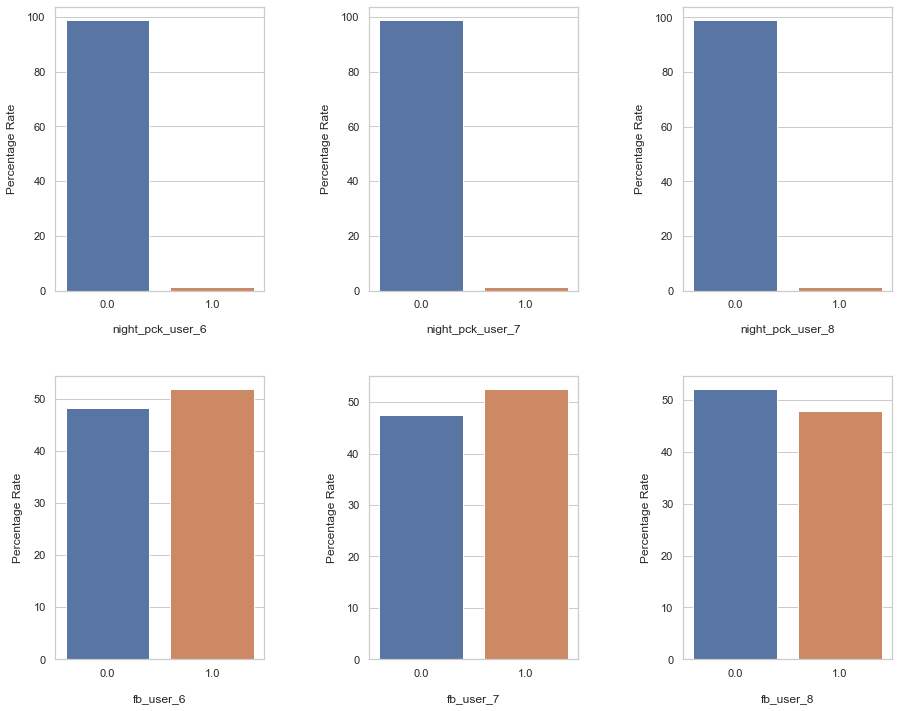

In [59]:
import seaborn as sns

# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((telecom_data[col_list].value_counts(dropna = False))/(len(telecom_data[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)


    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

Positive examples = 2441
Negative examples = 27560
Proportion of positive to negative examples = 8.86%


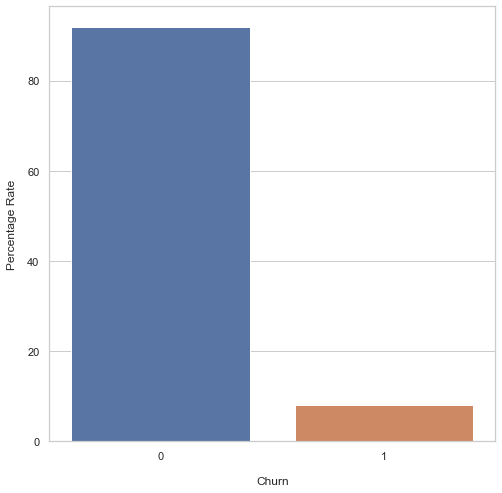

In [60]:
# Get number of positve and negative examples
pos = data[data["churn"] == 1].shape[0]
neg = data[data["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (8, 8))

series = round(((data["churn"].value_counts(dropna = False))/(len(data["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)


plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [61]:
def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

### Bivariate Analysis - Variables with hue = `churn`

In [62]:
def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()


Data Visualization of churn vs arpu


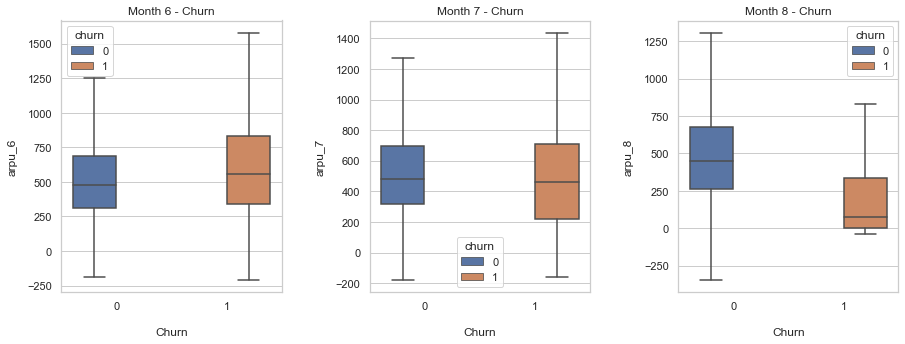


Data Visualization of churn vs onnet_mou


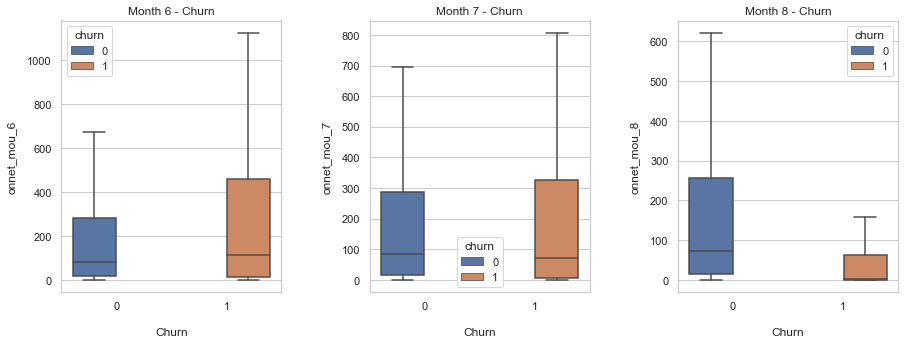


Data Visualization of churn vs offnet_mou


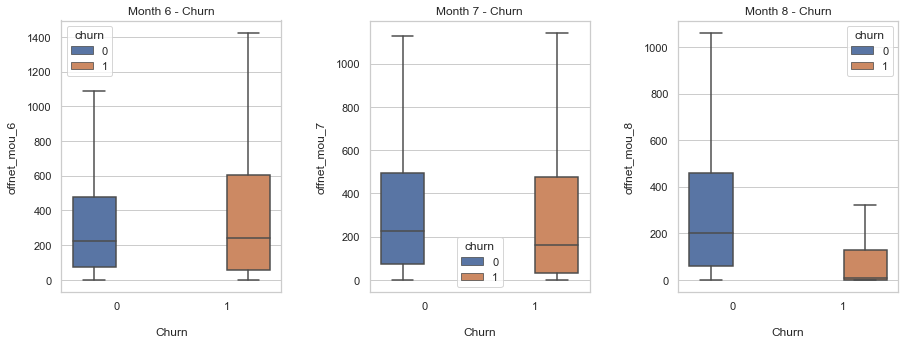


Data Visualization of churn vs total_og_mou


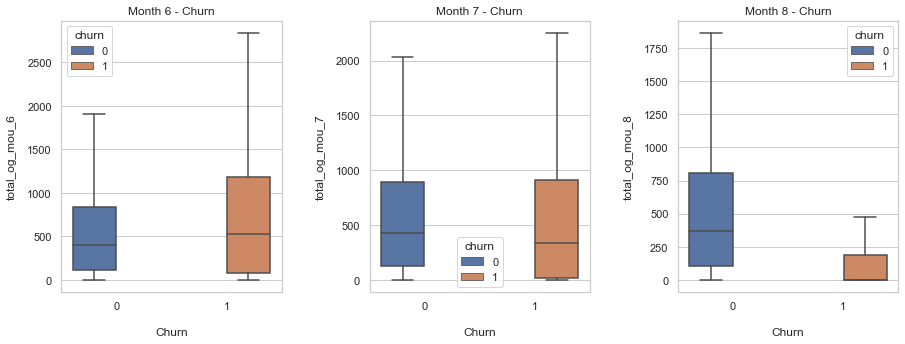


Data Visualization of churn vs total_ic_mou


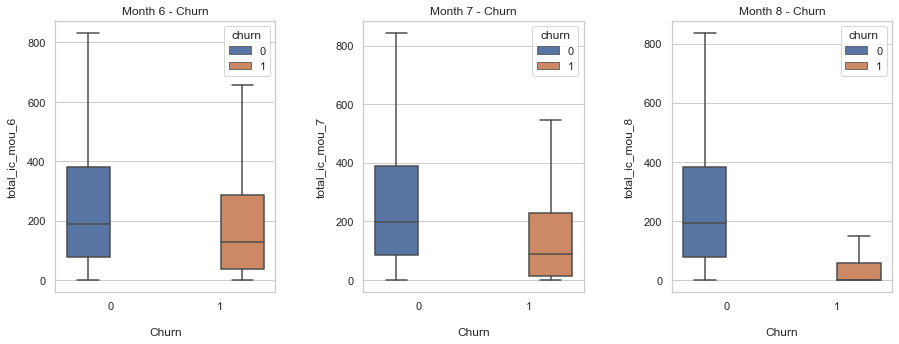


Data Visualization of churn vs total_rech_num


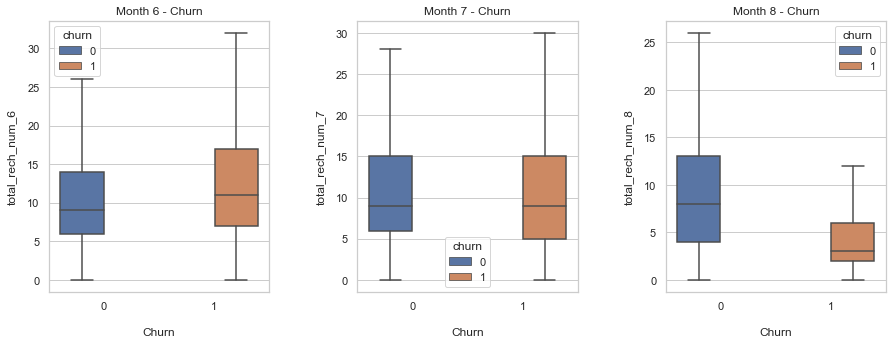


Data Visualization of churn vs total_rech_amt


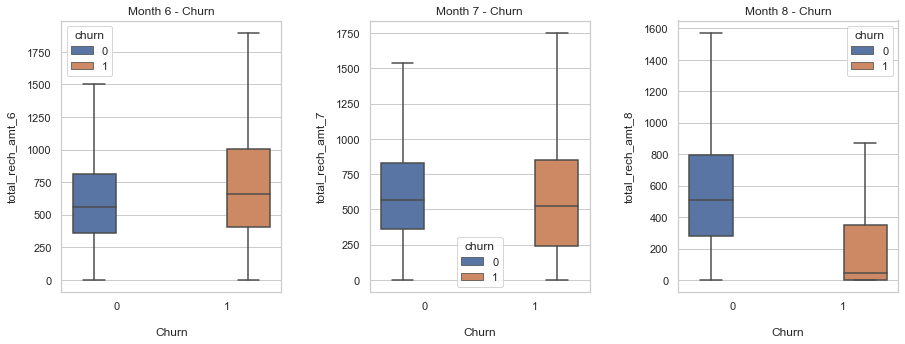


Data Visualization of churn vs total_rech_data


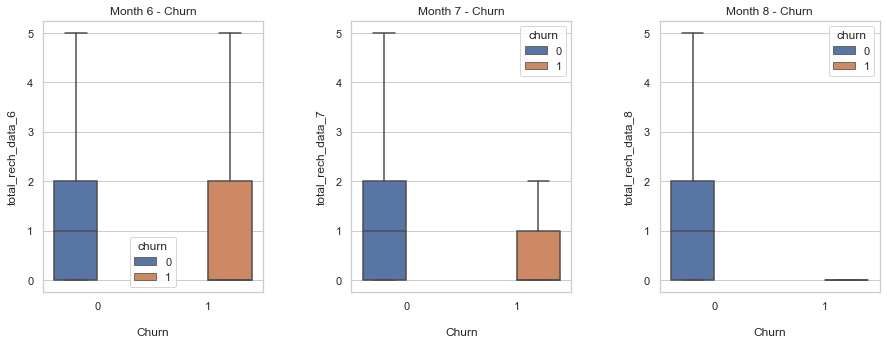


Data Visualization of churn vs vol_2g_mb


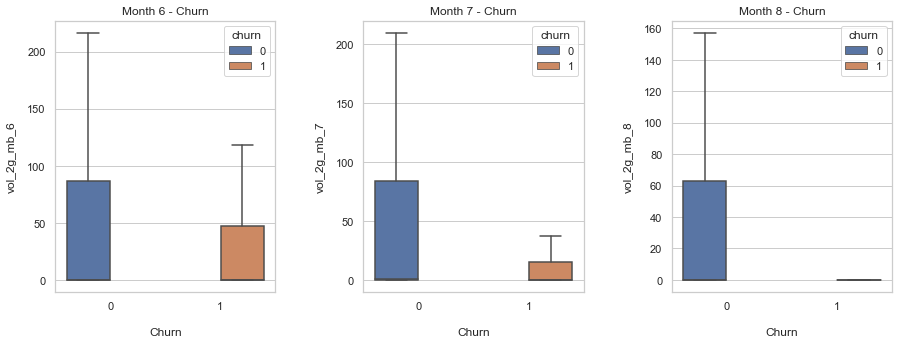


Data Visualization of churn vs vol_3g_mb


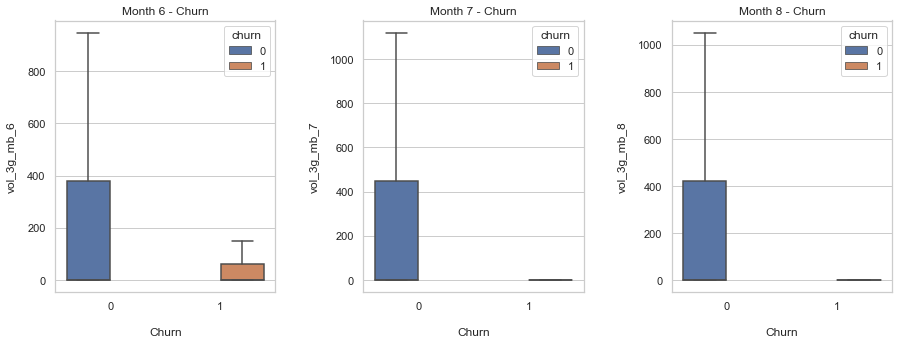


Data Visualization of churn vs vbc_3g


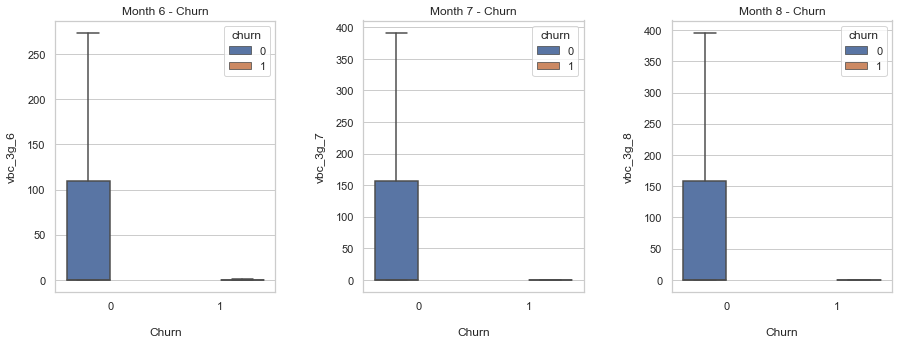


Data Visualization of churn vs total_data_rech_amt


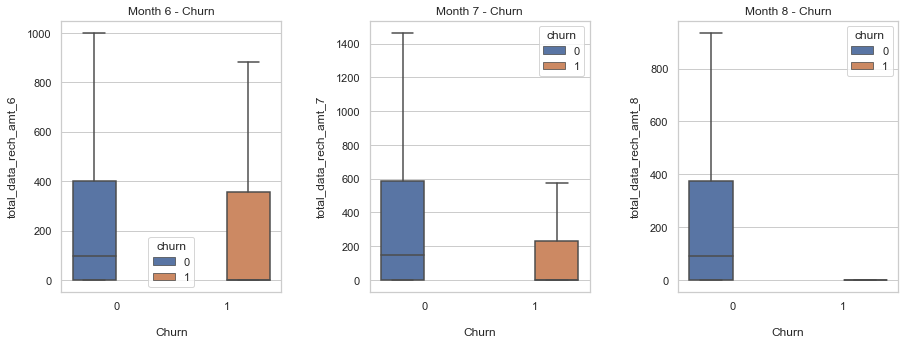

In [63]:
# Bivariate Analysis

plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")

### Bivariate Analysis - Quantitative Variables

In [64]:
data.corr()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,1.000000,0.671732,0.612617,0.342438,0.216136,0.186807,0.509280,0.339350,0.285100,0.126884,0.083484,0.090363,0.196086,0.143261,0.124994,0.328978,0.246204,0.223301,0.385851,0.230380,0.182037,0.466898,0.420753,0.413504,0.122743,0.068491,0.044582,0.054782,0.024347,0.015490,0.554510,0.363276,0.301856,0.181866,0.142514,0.124191,0.125126,0.085687,0.079334,0.225987,0.169024,0.150749,0.031356,-0.034186,-0.011741,0.103090,0.063193,0.070653,0.016183,0.023868,0.012284,0.349709,0.136098,0.119406,0.946125,0.650611,0.603673,0.337983,0.261993,0.284518,-0.108914,-0.175490,-0.122114,0.072714,-0.021877,0.025203,-0.165470,-0.208538,-0.161828,0.090485,0.020223,0.035060,-0.062580,-0.098980,-0.077949,0.152507,0.070184,0.084675,0.014224,-0.004902,0.009762,-0.039073,-0.084189,-0.061430,-0.158359,-0.193927,-0.152069,0.176436,0.081091,0.103661,-0.002555,-0.025233,-0.017509,-0.120360,-0.197733,-0.140312,0.041451,0.058547,0.055172,0.112462,0.089005,-0.023731,0.003324,0.067624
arpu_7,NaN,0.671732,1.000000,0.759858,0.211608,0.320818,0.270330,0.351713,0.490176,0.395668,0.092501,0.093692,0.093961,0.133520,0.179894,0.152217,0.213501,0.304529,0.255867,0.248495,0.381714,0.305135,0.416974,0.508862,0.452315,0.067268,0.114977,0.070283,0.017885,0.026086,0.017858,0.365323,0.535818,0.429002,0.109437,0.166531,0.145045,0.087602,0.124353,0.117452,0.139868,0.212497,0.185611,0.007228,-0.015645,-0.007172,0.058831,0.099618,0.082177,0.007882,0.024216,0.016651,0.164554,0.304170,0.221740,0.678296,0.943588,0.754470,0.262955,0.368861,0.373979,-0.165443,-0.094167,-0.090708,-0.018995,0.072084,0.049080,-0.197181,-0.157310,-0.139834,0.021384,0.107340,0.065052,-0.093453,-0.055195,-0.049745,0.070022,0.159023,0.117988,-0.003041,0.008977,0.018854,-0.081001,-0.033341,-0.048411,-0.182733,-0.151254,-0.132150,0.084523,0.190987,0.132849,-0.027247,0.010861,0.000907,-0.183840,-0.117152,-0.101672,0.031506,0.083801,0.102527,0.055324,-0.013371,0.091956,0.032377,-0.012789
arpu_8,NaN,0.612617,0.759858,1.000000,0.151677,0.233728,0.347706,0.279066,0.377210,0.524798,0.087996,0.077709,0.110842,0.128323,0.141421,0.199114,0.208515,0.264931,0.347333,0.150647,0.259674,0.402110,0.394451,

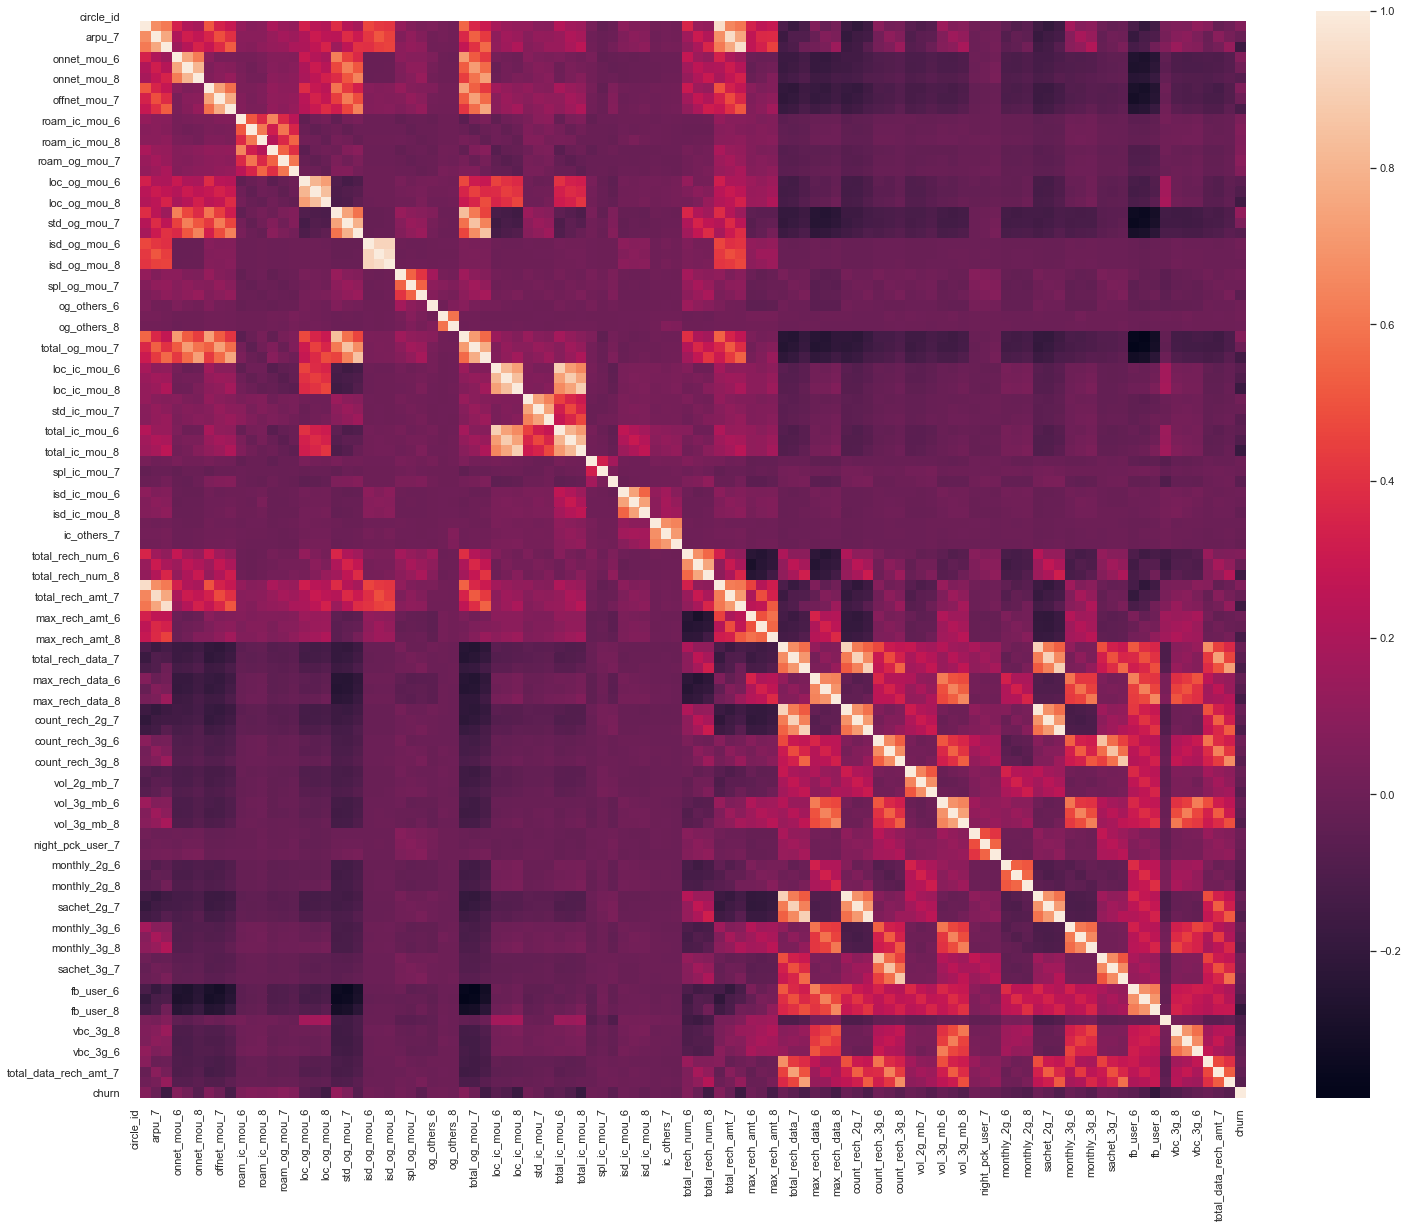

In [65]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr())
plt.show()

In [66]:
corr_matrix = data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  25


### Data Insight 5
There are many features that are highly correlated.

**Total of 25 features with a correlation > 0.80**

Note -
We will keep these highly correlated features for now. As we will be performing Principal Component Analysis in a later section these should get dropped automatically

# Part 7  - Feature Engineering

In [67]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [68]:
data = derive_good_action_phase(data, "arpu")

data = derive_good_action_phase(data, "onnet_mou")

data = derive_good_action_phase(data, "offnet_mou")

data = derive_good_action_phase(data, "roam_ic_mou")

data = derive_good_action_phase(data, "roam_og_mou")

data = derive_good_action_phase(data, "loc_og_mou")

data = derive_good_action_phase(data, "std_og_mou")

data = derive_good_action_phase(data, "isd_og_mou")

data = derive_good_action_phase(data, "spl_og_mou")

data = derive_good_action_phase(data, "og_others")

data = derive_good_action_phase(data, "total_og_mou")

data = derive_good_action_phase(data, "loc_ic_mou")

data = derive_good_action_phase(data, "std_ic_mou")

data = derive_good_action_phase(data, "spl_ic_mou")

data = derive_good_action_phase(data, "isd_ic_mou")

data = derive_good_action_phase(data, "ic_others")

data = derive_good_action_phase(data, "total_ic_mou")

data = derive_good_action_phase(data, "total_rech_num")

data = derive_good_action_phase(data, "total_rech_amt")

data = derive_good_action_phase(data, "max_rech_amt")

data = derive_good_action_phase(data, "total_rech_data")

data = derive_good_action_phase(data, "max_rech_data")

data = derive_good_action_phase(data, "count_rech_2g")

data = derive_good_action_phase(data, "count_rech_3g")

data = derive_good_action_phase(data, "vol_2g_mb")

data = derive_good_action_phase(data, "vol_3g_mb")

data = derive_good_action_phase(data, "monthly_2g")

data = derive_good_action_phase(data, "sachet_2g")

data = derive_good_action_phase(data, "monthly_3g")

data = derive_good_action_phase(data, "sachet_3g")

data = derive_good_action_phase(data, "vbc_3g")

data = derive_good_action_phase(data, "total_data_rech_amt")

data.head()

,circle_id,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,109,0,0,0,1,1,1,968,1,206.1005,7.7025,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,3.5,-1.5,307.0,-55.0,252.0,0.0,1.0,0.0,252.0,0.0,0.0,0.0,1.0,0.0,15.725,-9.975,117.165,-7.555,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.600,-20.200,252.0,0.0
1,109,0,0,0,0,0,0,802,1,1209.5150,1961.9650,56.26,-3.97,510.295,-184.385,24.86,6.78,18.165,19.895,478.035,-222.245,68.000,9.840,0.090,9.920,2.25,4.25,0.0,0.0,548.385,-198.225,391.555,-203.515,176.810,17.130,0.105,-0.105,8.295,23.295,15.465,-0.325,592.250,-163.510,5.0,2.0,1185.0,2453.0,1185.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.060,38.680,0.0,0.0
2,109,0,0,0,0,1,1,315,0,435.4720,-298.1100,382.36,-347.28,87.645,48.835,0.00,0.00,0.000,0.000,333.135,-270.095,136.870,-38.590,0.000,0.000,0.00,10.23,0.0,0.0,470.010,-298.450,52.630,-36.840,13.545,-12.795,0.000,0.000,0.000,0.000,0.000,0.000,66.175,-49.635,20.0,-6.0,519.0,-399.0,122.0,-92.0,1.0,2.0,77.0,-54.0,1.0,2.0,0.0,0.0,178.000,-177.970,375.475,-363.535,0.5,-0.5,0.5,2.5,0.0,0.0,0.0,0.0,516.405,-495.375,177.0,30.0
3,109,0,0,0,0,0,0,720,0,556.1030,81.6570,117.26,-32.12,827.305,156.085,0.00,0.00,0.000,0.000,95.565,34.175,848.990,89.800,0.000,0.000,0.00,0.00,0.0,0.0,944.565,123.975,106.505,52.605,62.985,38.945,0.000,0.000,0.000,0.000,0.000,0.000,169.490,91.550,24.0,3.0,640.0,78.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
4,109,0,0,0,0,1,1,604,0,134.1235,232.8425,49.81,-16.23,87.385,118.505,0.00,0.00,0.000,0.000,132.795,49.345,4.355,35.255,0.005,-0.005,0.05,17.66,0.0,0.0,137.210,102.270,145.520,78.690,8.915,48.375,0.000,0.000,14.115,-10.375,2.675,10.385,171.235,127.095,4.0,0.0,227.0,212.0,89.5,89.5,1.0,1.0,89.5,89.5,0.0,0.0,1.0,1.0,0.240,-0.230,299.545,710.375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.930,14.520,356.0,184.0


# Part 8- Model Building

### 1. Train and Test Split

In [69]:
X = data.drop('churn', axis = 1)
y = data[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 72)
(21000, 1)
(9001, 72)
(9001, 1)


### 2. Data Normalization (Outlier Treatment)

In [70]:
# Normalize the data
scaler = RobustScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

### 3. Handling Imbalanced Dataset
**Pre-Processing Techniques**

In [71]:
# Implement SMOTEENN
def implement_smoteenn(X_train, y_train):
    
    sampling = SMOTEENN(random_state = 100)
    X_train_resampled, y_train_resampled = sampling.fit_resample(X_train.values, y_train.values.ravel())

    # Shuffle the data
    perms = np.random.permutation(X_train_resampled.shape[0])
    X_train_resampled = X_train_resampled[perms]
    y_train_resampled = y_train_resampled[perms]

    X_train_resampled = pd.DataFrame(data = X_train_resampled)
    y_train_resampled = pd.DataFrame(data = y_train_resampled)

    print(X_train_resampled.shape)
    print(y_train_resampled.shape)
    
    return X_train_resampled, y_train_resampled

In [72]:
# Custom Function for ensembling classifiers using sampling and then Shuffling the data

def transform(transformer, X, y):
    
    print("Transforming {}".format(transformer.__class__.__name__))
    
    X_resampled, y_resampled = transformer.fit_resample(X.values, y.values.ravel())
    
    # Shuffle the data
    perms = np.random.permutation(X_resampled.shape[0])
    X_resampled = X_resampled[perms]
    y_resampled = y_resampled[perms]
    
    # Return the classifier, X_resampled and y_resampled
    return transformer.__class__.__name__, pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

In [73]:
# Custom Function to Apply transformations to dataset

def apply_transformations(dataset, X_train, y_train):
    
    dataset.append(("base", X_train, y_train))
    
    dataset.append(transform(SMOTE(n_jobs = -1, random_state = 100), X_train, y_train))
    
    dataset.append(transform(RandomOverSampler(random_state = 100), X_train, y_train))
    
    dataset.append(transform(NearMiss(n_jobs = -1), X_train, y_train))

    dataset.append(transform(RandomUnderSampler(random_state = 100), X_train, y_train))

    dataset.append(transform(SMOTEENN(random_state = 100), X_train, y_train))

    dataset.append(transform(SMOTETomek(random_state = 100), X_train, y_train))
    
    return dataset

### 4. Model Building

In [74]:
# Custom Function to get Scores and plots
def get_scores(scores, reg, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    pred_test = reg.predict(X_test.values)

    pred_test_probs = reg.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
    precision, recall, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)

    model_f1_score = f1_score(y_test.values.ravel(), pred_test)
    model_precision_score = precision_score(y_test.values.ravel(), pred_test)
    model_recall_score = recall_score(y_test.values.ravel(), pred_test)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(recall,precision)

    scores.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr,
                   confusion_matrix(y_test.values.ravel(), pred_test)))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(recall, precision, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend(loc = "lower right")
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

In [75]:
# Custom Function for Model Building

def model(sampling_type, X, y, param_grid, model_type, ml = 'None'):
    
    model_type_list = ['Logistic', 'SVM', 'Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost', 'LightGBM']
    
    if model_type == 'Logistic':
    
        ml = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)
    
    elif model_type == 'SVM':
        
        ml = SVC(C = 1000, kernel = 'rbf', probability = True, random_state = 100)
    
    elif model_type == 'Decision Tree':
        
        ml = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, min_samples_leaf = 46, random_state = 100)
    
    elif model_type == 'Random Forest':
        
        ml = RandomForestClassifier(n_estimators = 900, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                                    n_jobs = -1, random_state = 100)
    
    elif model_type == 'Adaboost':
        
        dt = DecisionTreeClassifier(max_depth = 17, min_samples_split = 3, min_samples_leaf = 1, random_state = 100)

        ml = AdaBoostClassifier(base_estimator = dt, n_estimators = 300, learning_rate = 0.3, random_state = 100)
    
    elif model_type == 'XGBoost':
        
        ml = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_estimators = 900, min_child_weight = 1,
                           subsample = 0.9, colsample_bytree = 0.4, n_jobs = -1, random_state = 100)
    
    elif model_type == 'LightGBM':
        
        ml = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                            min_child_samples = 20, subsample = 0.1, colsample_bytree = 1,
                            objective = 'binary', n_jobs = -1, random_state = 100)
    if model_type not in model_type_list:
        
        gc = GridSearchCV(estimator = ml, param_grid = param_grid, scoring = 'roc_auc',
                          n_jobs = 15, cv = 5, verbose = 2,return_train_score=True)
    
    else:
        
        gc = ml
    
    gc = gc.fit(X.values, y.values.ravel())
    
    if model_type in model_type_list:
        
        return sampling_type, gc
    
    else:
        
        return gc

In [76]:
# Custom Function to plot GridSearch Result to get the best value

def hypertuning_plot(scores, parameter):
    
    col = "param_" + parameter
    
    plt.figure()
    
    plt.plot(scores[col], scores["mean_train_score"], label = "training accuracy")
    plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")
    
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    
    plt.legend()
    plt.show()

In [77]:
# Custom Function to Train/evaluate models for each of tranformed datasets

def evaluate_train(scores, benchmark_scores, dataset, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    # train models based on benchmark params
    for sampling_type, reg in benchmark_scores:

        print("Training on {}".format(sampling_type))

        for s_type, X, y in dataset:

            if s_type == sampling_type:

                pred_test = reg.predict(X_test.values)

                probs = reg.predict_proba(X_test.values)[:, 1:]

                fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
                precision, recall, t = precision_recall_curve(y_test.values.ravel(), probs)

                model_f1_score = f1_score(y_test.values.ravel(), pred_test)
                model_precision_score = precision_score(y_test.values.ravel(), pred_test)
                model_recall_score = recall_score(y_test.values.ravel(), pred_test)
                model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
                model_auc_roc = auc(fpr, tpr)
                model_auc_pr = auc(recall,precision)

                scores.append((sampling_type,
                               model_f1_score,
                               model_precision_score,
                               model_recall_score,
                               model_accuracy_score,
                               model_auc_roc,
                               model_auc_pr,
                               confusion_matrix(y_test.values.ravel(), pred_test)))

                axes[0].plot(fpr, tpr, label = f"{s_type}, auc_roc = {model_auc_roc:.3f}")
                axes[1].plot(recall, precision, label = f"{s_type}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend()
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

In [78]:
def get_different_sampling_type_results(regression_type, X_test):
    
    # Apply Logistic Regression with on Different Sampling Types

    benchmark_scores = []
    
    param_grid = {}

    for sample_type, X, y in dataset:

        print('Performing {}'.format(sample_type))

        benchmark_scores.append(model(sample_type, X, y, param_grid, regression_type))
    
    print(' ')
    
    # Train/evaluate models for each of tranformed datasets
    scores = []

    scores = evaluate_train(scores, benchmark_scores, dataset, X_test)

    # Tabulate results
    sampling_results = pd.DataFrame(scores, columns = ['Sampling Type', 'f1', 'precision', 'recall', 'accuracy',
                                                       'auc_roc', 'auc_pr', 'confusion_matrix'])
    
    return sampling_results

### 4.1 PCA - Dimensionality Reduction

In [79]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (12,8))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [80]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print(X_train_pca.shape)
    print(y_train.shape)
    print(X_test_pca.shape)
    print(y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (20,10))
    sns.heatmap(corrmat, annot = True)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    # we see that correlations are indeed very close to 0
    
    return X_train_pca, X_test_pca

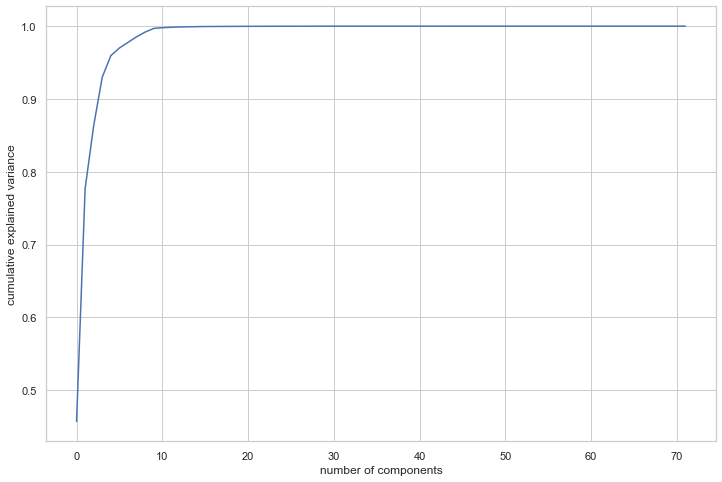

In [81]:
perform_PCA(X_train)

(21000, 5)
(21000, 1)
(9001, 5)
(9001, 1)


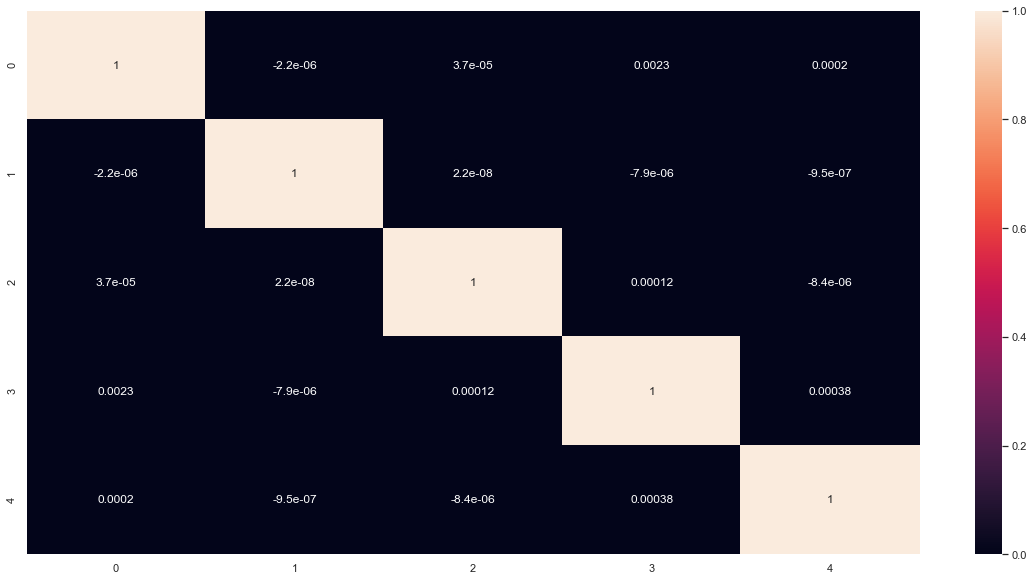

max corr: 0.0022762365330695426 , min corr:  -8.446827326215872e-06


In [82]:
X_train_pca, X_test_pca = perform_incremental_PCA(X_train, y_train, 5)

**Now Let's handle Class Imbalance on PCA derived data**

In [83]:
# Implement SMOTEENN
X_train_resampled, y_train_resampled = implement_smoteenn(X_train_pca, y_train)

(26707, 5)
(26707, 1)


###  4.2 Logistic Regression
**Running the Logistic Regression with default parameters.**

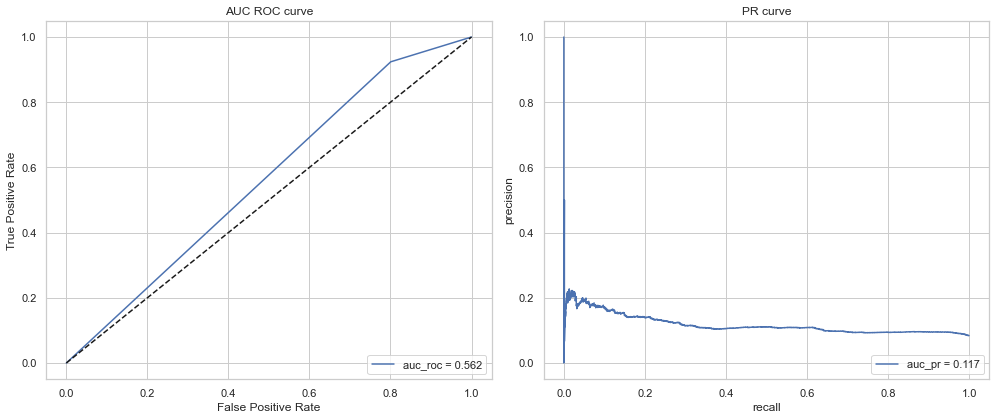

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.172174,0.094932,0.924,0.259638,0.561624,0.117344,"[[1644, 6607], [57, 693]]"


In [84]:
# Logistic Regression with Default Parameters

lr = LogisticRegression(n_jobs = -1, random_state = 100)

lr = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lr, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### 4.2.1 Logistic Regression - HyperTuning
**Logistic Regression - HyperTuning Penalty**

Fitting 5 folds for each of 2 candidates, totalling 10 fits


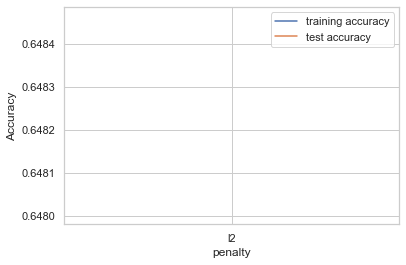

{'penalty': 'l2'}

In [85]:
# GridSearchCV to find best penalty

lr = LogisticRegression(n_jobs = -1, random_state = 100)

parameter = 'penalty'

# parameters to build the model on
param_grid = {parameter: ['l1', 'l2']}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

**Logistic Regression - HyperTuning C**

Fitting 5 folds for each of 4 candidates, totalling 20 fits


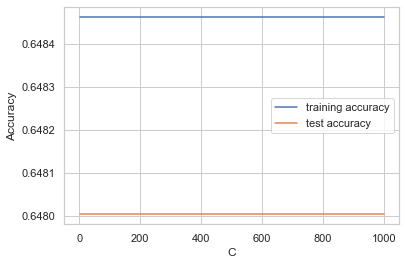

{'C': 1}

In [86]:
# GridSearchCV to find best C

# Penalty remains the same and hence any penalty method (l1 or l2) can be taken into consideration.

lr = LogisticRegression(penalty = 'l2', n_jobs = -1, random_state = 100)

parameter = 'C'

# parameters to build the model on
param_grid = {parameter: [1, 10, 100, 1000]}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

**Running the Logistic Regression with best parameters obtained from grid search.**

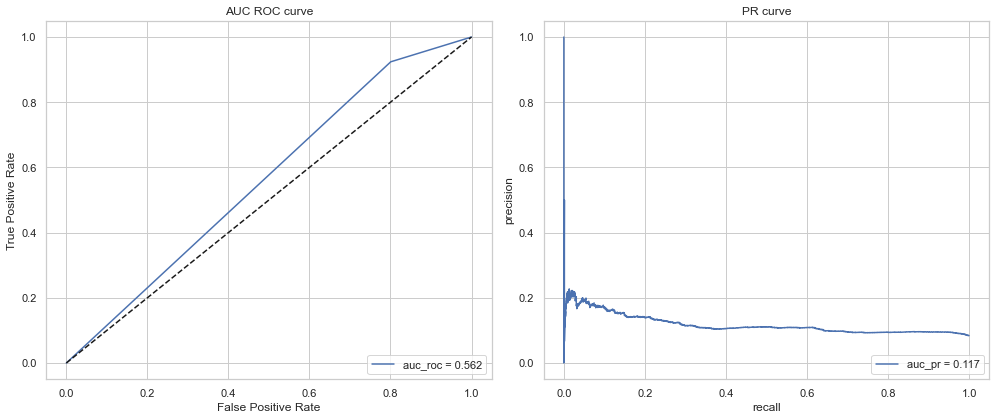

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.172174,0.094932,0.924,0.259638,0.561624,0.117344,"[[1644, 6607], [57, 693]]"


In [87]:
# Logistic with best parameters obtained from grid search

lr = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)

lrf = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lrf, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**The score is very low. Let's see the effect of other sampling techniques.**

In [88]:
# Apply Class Imbalance transformations to dataset

dataset = []

dataset = apply_transformations(dataset, X_train_resampled, y_train_resampled)

Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing NearMiss
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


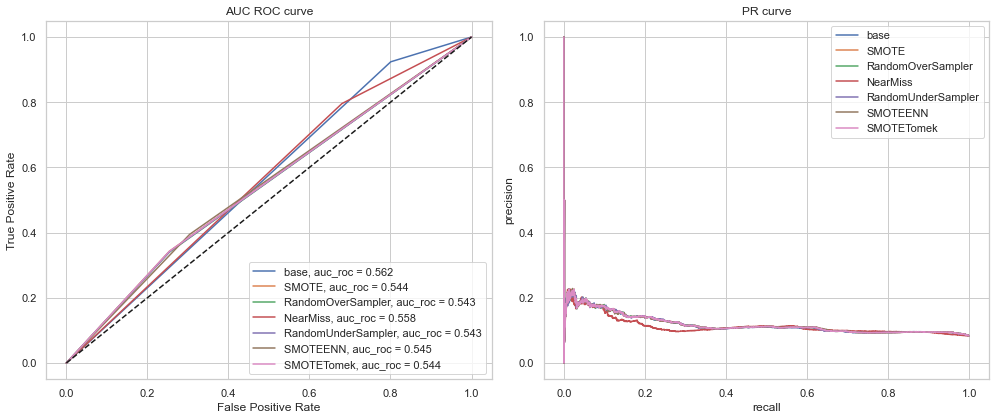

,Sampling Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.172174,0.094932,0.924000,0.259638,0.561624,0.117344,"[[1644, 6607], [57, 693]]"
1,SMOTE,0.165539,0.109130,0.342667,0.712143,0.544197,0.117807,"[[6153, 2098], [493, 257]]"
2,RandomOverSampler,0.164401,0.108547,0.338667,0.713143,0.542924,0.117661,"[[6165, 2086], [496, 254]]"
3,NearMiss,0.171527,0.096120,0.796000,0.359293,0.557799,0.112607,"[[2637, 5614], [153, 597]]"
4,RandomUnderSampler,0.164796,0.108485,0.342667,0.710588,0.543349,0.117720,"[[6139, 2112], [493, 257]]"
5,SMOTEENN,0.166386,0.105413,0.394667,0.670481,0.545109,0.117773,"[[5739, 2512], [454, 296]]"
6,SMOTETomek,0.165539,0.109130,0.342667,0.712143,0.544197,0.117807,"[[6153, 2098], [493, 257]]"


In [89]:
# Get Different Sampling Results

sampling_results = get_different_sampling_type_results('Logistic', X_test_pca)

# Tabulate results
sampling_results

Interpretation
- RandomUnderSampler leads to high recall but comes at a huge cost to precision (also reduces training time).
- SMOTE and RandomOverSampler perform good considering auc_roc and auc_pr with accpetables levels of false positives.

**None of the Sampling Type scores can be accepted as they are very low. We will proceed with some different Machine Learning algorithms to increase the scores (f1, precision, recall, accuracy, auc_roc).**

### 4.3 Support Vector Machine (SVM)

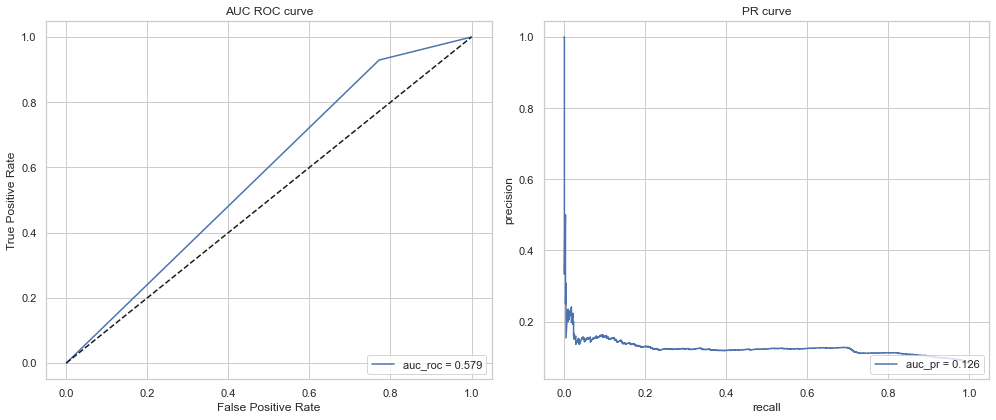

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.178352,0.098641,0.929333,0.286524,0.578713,0.12596,"[[1882, 6369], [53, 697]]"


In [90]:
# SVM with Default Parameters and probability = True

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, svm, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### 4.3.1 SVM - HyperTuning
**SVM - HyperTuning Parameter C**

Fitting 5 folds for each of 2 candidates, totalling 10 fits


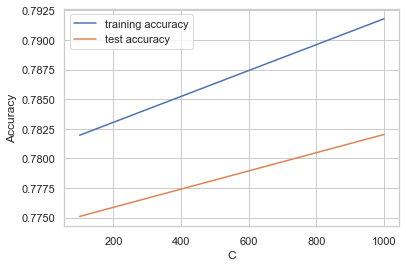

{'C': 1000}

In [91]:
# GridSearchCV to find best min_samples_split

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

parameter = 'C'

# parameters to build the model on
param_grid = {parameter: [100, 1000]}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', svm)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

**Running the SVM with best parameters obtained from grid search.**

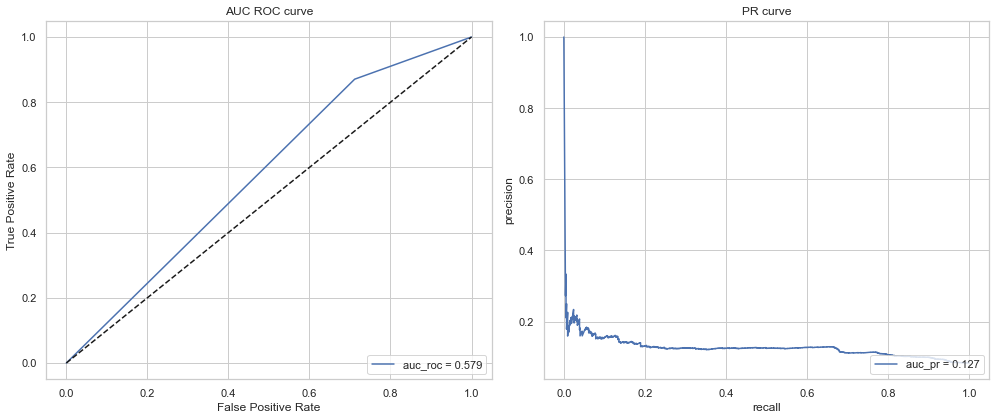

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.179519,0.100077,0.870667,0.336851,0.579498,0.127109,"[[2379, 5872], [97, 653]]"


In [92]:
# SVM with best parameters obtained from grid search

svm = SVC(C = 1000, kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, svm, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### Interpretation:
**From SVM**:

With Default Parameters, we got:
- f1	precision	recall	accuracy	auc_roc	auc_pr	confusion_matrix
- 0.178352	0.098641	0.929333	0.286524	0.578713	0.12596	[[1882, 6369], [53, 697]]

And With HyperTuning, we got:
- f1	precision	recall	accuracy	auc_roc	auc_pr	confusion_matrix
- 0.179519	0.100077	0.870667	0.336851	0.579498	0.127109	[[2379, 5872], [97, 653]]
**The score is very low. Let's see the effect of other sampling techniques.**

Performing base
Performing SMOTE
Performing RandomOverSampler
Performing NearMiss
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


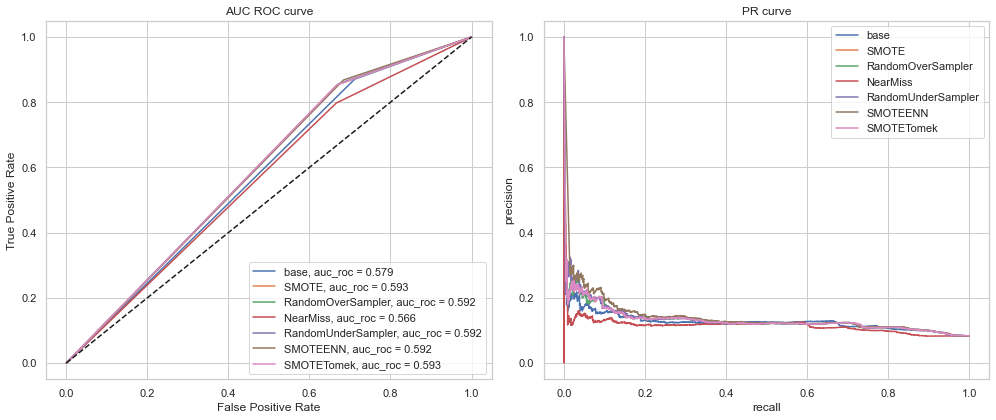

,Sampling Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.179519,0.100077,0.870667,0.336851,0.579498,0.127109,"[[2379, 5872], [97, 653]]"
1,SMOTE,0.185400,0.103997,0.853333,0.375181,0.592525,0.132164,"[[2737, 5514], [110, 640]]"
2,RandomOverSampler,0.184988,0.103699,0.856000,0.371514,0.591738,0.131890,"[[2702, 5549], [108, 642]]"
3,NearMiss,0.174726,0.098113,0.797333,0.372403,0.565556,0.113617,"[[2754, 5497], [152, 598]]"
4,RandomUnderSampler,0.185201,0.103833,0.856000,0.372403,0.592223,0.132715,"[[2710, 5541], [108, 642]]"
5,SMOTEENN,0.184891,0.103465,0.868000,0.362293,0.592163,0.142164,"[[2610, 5641], [99, 651]]"
6,SMOTETomek,0.185400,0.103997,0.853333,0.375181,0.592525,0.132041,"[[2737, 5514], [110, 640]]"


In [93]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('SVM', X_test_pca)

# Tabulate results
sampling_results

### Inference:
For SVM, SmoteTomek Performs better than other sampling techniques. With Hypertuned, we got:

f1	precision	recall	accuracy	auc_roc	auc_pr	confusion_matrix
0.185400	0.103997	0.853333	0.375181	0.592525	0.132041	[[2737, 5514], [110, 640]]
**The score is still very low. Let's try with other Machine Learning Models and see the result.**

### 4.4 Decision Tree

In [94]:
# Implement SMOTEENN on the whole train Dataset
X_train_resampled, y_train_resampled = implement_smoteenn(X_train, y_train)

(31894, 72)
(31894, 1)


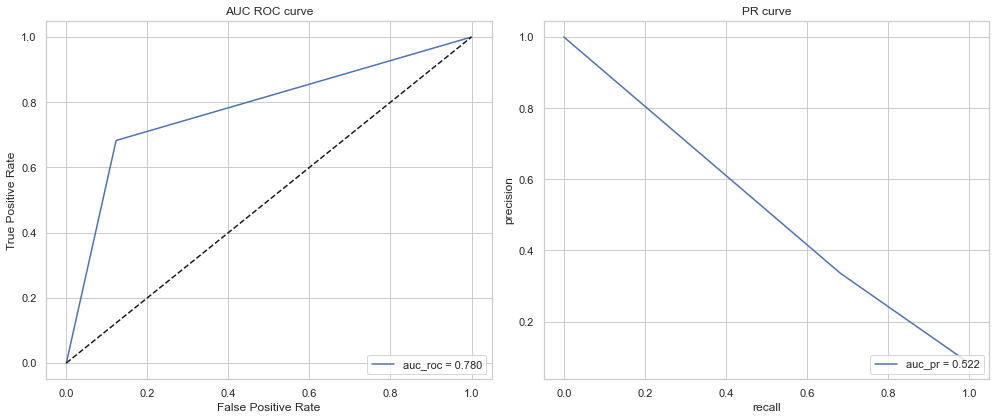

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.449912,0.335518,0.682667,0.860904,0.779886,0.522313,"[[7237, 1014], [238, 512]]"


In [95]:
# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, tree, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### 4.4.1 Decision Tree - HyperTuning
**Decision Tree - HyperTuning max_depth**

Fitting 5 folds for each of 29 candidates, totalling 145 fits


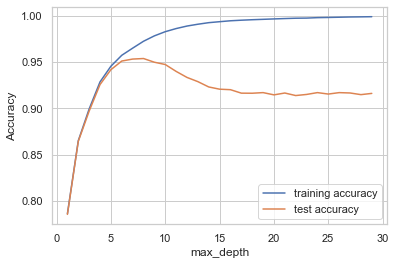

{'max_depth': 8}

In [96]:
# GridSearchCV to find optimal max_depth

tree = DecisionTreeClassifier(random_state = 100)

parameter = 'max_depth'

# parameters to build the model on
param_grid = {parameter: range(1, 30)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', tree)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Decision Tree - HyperTuning min_samples_split

In [ ]:
# GridSearchCV to find optimal min_samples_split

tree = DecisionTreeClassifier(max_depth = 8, random_state = 100)

parameter = 'min_samples_split'

# parameters to build the model on
param_grid = {parameter: range(2, 30)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', tree)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Decision Tree - HyperTuning min_samples_leaf

Fitting 5 folds for each of 60 candidates, totalling 300 fits


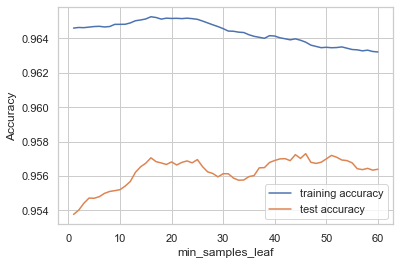

{'min_samples_leaf': 46}

In [98]:
# GridSearchCV to find optimal min_samples_leaf

tree = DecisionTreeClassifier(max_depth =8, min_samples_split = 26, random_state = 100)

parameter = 'min_samples_leaf'

# parameters to build the model on
param_grid = {parameter: range(1, 61)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', tree)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Running the Decision Tree Model with best parameters obtained from grid search.

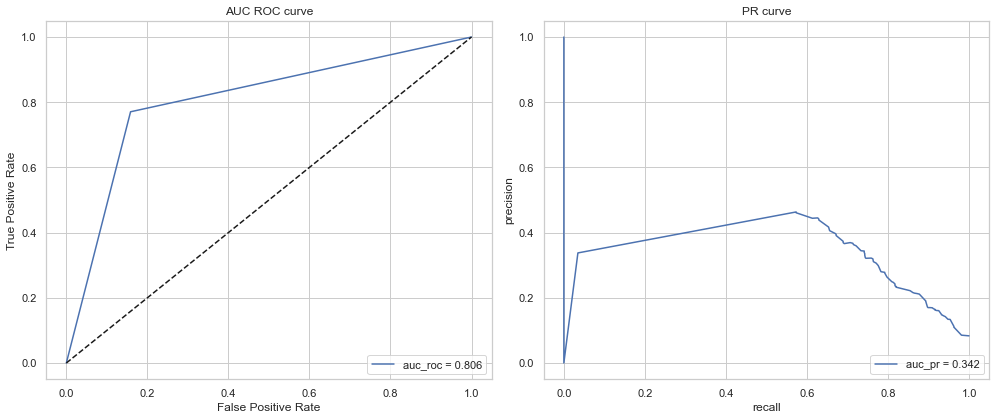

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.438543,0.306469,0.770667,0.835574,0.80607,0.342447,"[[6943, 1308], [172, 578]]"


In [99]:
# Decision Tree with best parameters obtained from grid search

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 26, min_samples_leaf = 46, random_state = 100)

tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, tree, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**Thus, it shows that there is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model (After HyperTuning)**

Note:

We have used SMOTEENN sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTEENN or not.

In [100]:
# Apply Class Imbalance transformations to dataset

dataset = []

dataset = apply_transformations(dataset, X_train, y_train)

Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing NearMiss
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


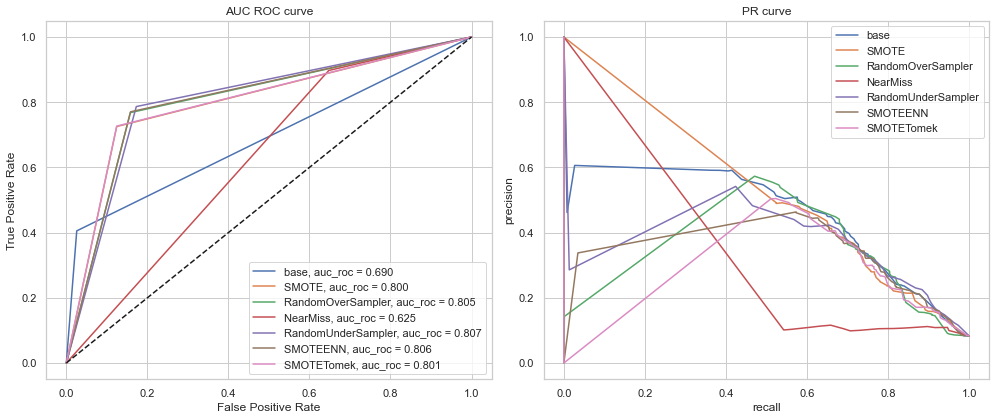

,Sampling Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.480253,0.589147,0.405333,0.926897,0.689820,0.459782,"[[8039, 212], [446, 304]]"
1,SMOTE,0.468966,0.346497,0.725333,0.863126,0.800492,0.533142,"[[7225, 1026], [206, 544]]"
2,RandomOverSampler,0.438189,0.306546,0.768000,0.835907,0.805040,0.345434,"[[6948, 1303], [174, 576]]"
3,NearMiss,0.198906,0.111850,0.897333,0.397734,0.624827,0.347026,"[[2907, 5344], [77, 673]]"
4,RandomUnderSampler,0.426763,0.292804,0.786667,0.823908,0.806980,0.372611,"[[6826, 1425], [160, 590]]"
5,SMOTEENN,0.438543,0.306469,0.770667,0.835574,0.806070,0.342447,"[[6943, 1308], [172, 578]]"
6,SMOTETomek,0.469625,0.346913,0.726667,0.863237,0.801159,0.276224,"[[7225, 1026], [205, 545]]"


In [101]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('Decision Tree', X_test)

# Tabulate results
sampling_results

### 4.5 Random Forest
**Running the Random Forest Model with default parameters.**

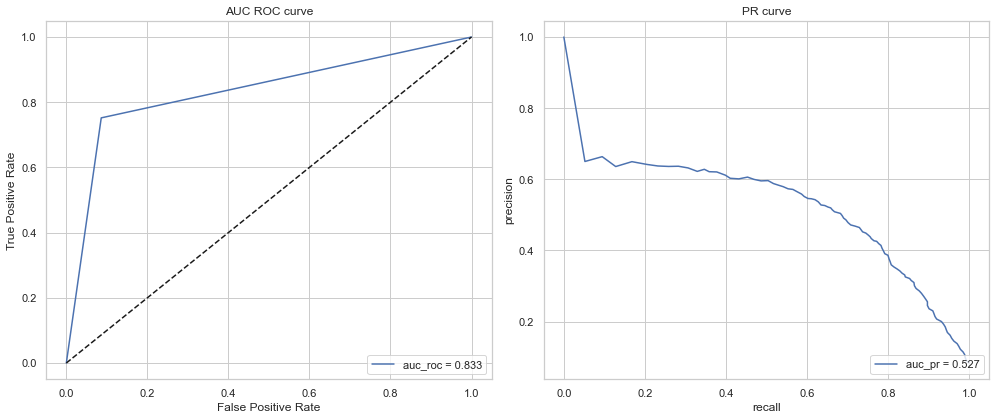

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.557037,0.442353,0.752,0.900344,0.832914,0.526996,"[[7540, 711], [186, 564]]"


In [102]:
# Random Forest with Default Parameters

rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, rfc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### 4.5.1 Random Forest - HyperTuning
**Random Forest - HyperTuning n_estimators**

Fitting 5 folds for each of 9 candidates, totalling 45 fits


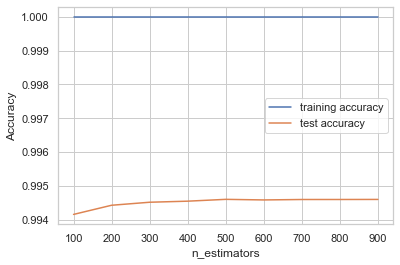

{'n_estimators': 500}

In [103]:
# GridSearchCV to find optimal n_estimators

rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

parameter = 'n_estimators'

# parameters to build the model on
param_grid = {parameter: range(100, 1000, 100)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', rfc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Random Forest - HyperTuning max_depth

In [ ]:
# GridSearchCV to find optimal max_depth

rfc = RandomForestClassifier(n_estimators = 500, n_jobs = -1, random_state = 100)

parameter = 'max_depth'

# parameters to build the model on
param_grid = {parameter: range(1, 30)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', rfc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Random Forest - HyperTuning min_samples_split

Fitting 5 folds for each of 5 candidates, totalling 25 fits


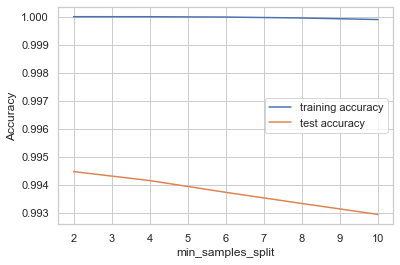

{'min_samples_split': 2}

In [105]:
# GridSearchCV to find optimal min_samples_split

rfc = RandomForestClassifier(n_estimators = 500, max_depth = 29, n_jobs = -1, random_state = 100)

parameter = 'min_samples_split'

# parameters to build the model on
param_grid = {parameter: range(2, 11, 2)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', rfc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Random Forest - HyperTuning min_samples_leaf

Fitting 5 folds for each of 9 candidates, totalling 45 fits


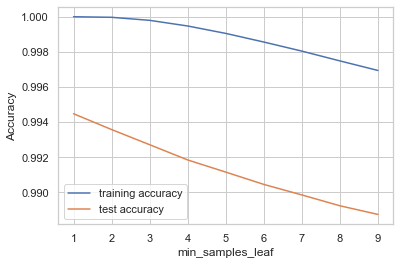

{'min_samples_leaf': 1}

In [106]:
# GridSearchCV to find optimal min_samples_leaf

rfc = RandomForestClassifier(n_estimators = 900, max_depth = 29, min_samples_split = 2,
                             n_jobs = -1, random_state = 100)

parameter = 'min_samples_leaf'

# parameters to build the model on
param_grid = {parameter: range(1, 10)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', rfc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Running the Random Forest Model with best parameters obtained from grid search.

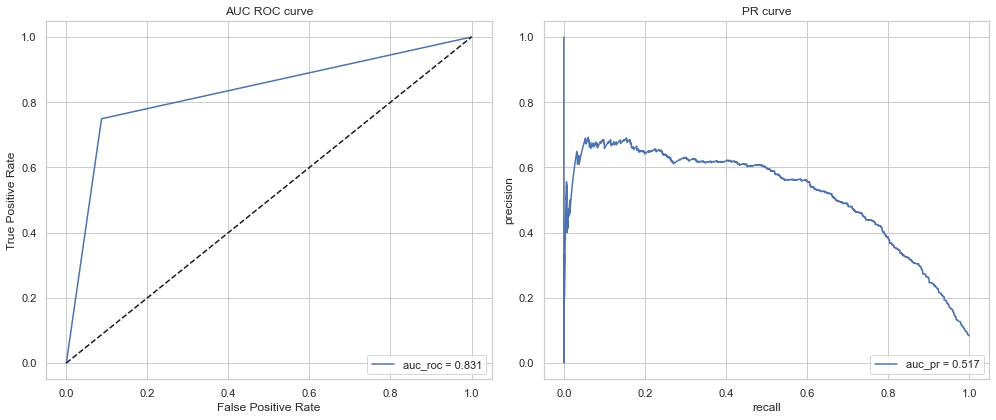

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.553967,0.439406,0.749333,0.899456,0.831217,0.517274,"[[7534, 717], [188, 562]]"


In [107]:
# Random Forest with best parameters obtained from grid search

rfc = RandomForestClassifier(n_estimators = 500, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                             n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, rfc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**Random Forest has a better score than Decision Tree. There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of Random Forest (After HyperTuning)**

Note:

We have used SMOTEENN sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTEENN or not.

Performing base
Performing SMOTE
Performing RandomOverSampler
Performing NearMiss
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


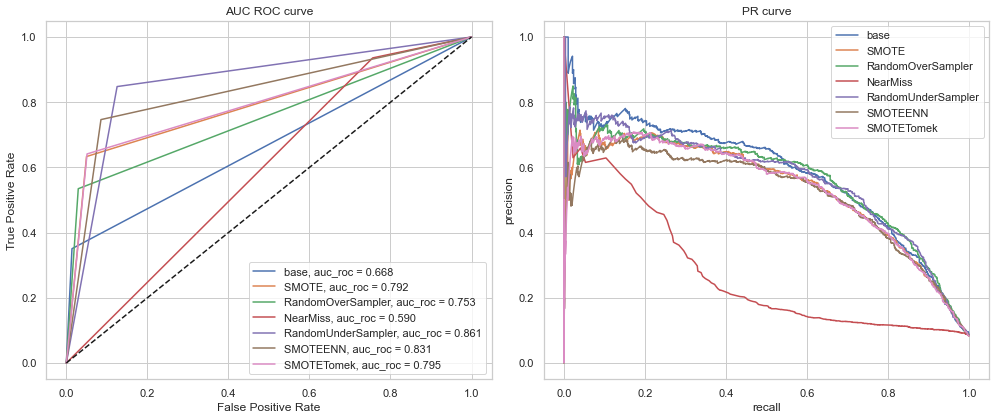

,Sampling Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.466312,0.695767,0.350667,0.933119,0.668364,0.580070,"[[8136, 115], [487, 263]]"
1,SMOTE,0.580685,0.536117,0.633333,0.923786,0.791761,0.533908,"[[7840, 411], [275, 475]]"
2,RandomOverSampler,0.575323,0.622671,0.534667,0.934230,0.752608,0.561090,"[[8008, 243], [349, 401]]"
3,NearMiss,0.182527,0.101124,0.936000,0.301411,0.589864,0.274837,"[[2011, 6240], [48, 702]]"
4,RandomUnderSampler,0.525620,0.380838,0.848000,0.872459,0.861341,0.564168,"[[7217, 1034], [114, 636]]"
5,SMOTEENN,0.555831,0.442688,0.746667,0.900567,0.830611,0.516740,"[[7546, 705], [190, 560]]"
6,SMOTETomek,0.581972,0.532669,0.641333,0.923231,0.795094,0.532659,"[[7829, 422], [269, 481]]"


In [108]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('Random Forest', X_test)

# Tabulate results
sampling_results

### 4.6 Adaboost
**Running the Adaboost Classifier with default parameters**

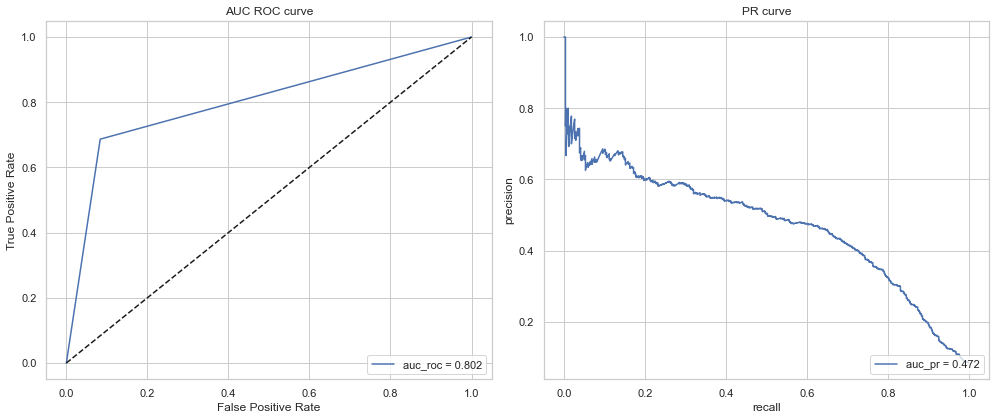

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.526854,0.427386,0.686667,0.897234,0.80152,0.472006,"[[7561, 690], [235, 515]]"


In [109]:
# Adaboost with Default Parameters

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, random_state = 100)

abc = abc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, abc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### 4.6.1 Adaboost - HyperTuning
**Adaboost - HyperTuning n_estimators**

Fitting 5 folds for each of 5 candidates, totalling 25 fits


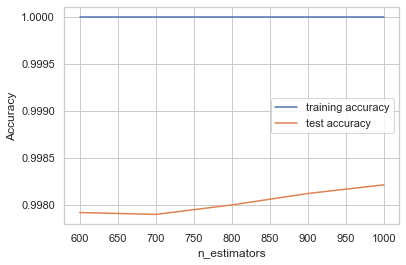

{'n_estimators': 1000}

In [110]:
# GridSearchCV to find best n_estimators

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, random_state = 100)

parameter = 'n_estimators'

param_grid = {parameter: range(600, 1100, 100)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', abc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Adaboost - HyperTuning learning_rate

In [ ]:
# GridSearchCV to find best learning_rate

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, n_estimators = 1000, random_state = 100)

parameter = 'learning_rate'

param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', abc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Running the Adaboost Model with best parameters obtained from grid search.

In [ ]:
# AdaBoost with best parameters obtained from grid search

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, n_estimators = 1000, learning_rate = 0.9, random_state = 100)

abc = abc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, abc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

In [ ]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('Adaboost', X_test)

# Tabulate results
sampling_results

### 4.7 XGBoost
**Running the XGBoost Classifier with default parameters.**

In [ ]:
# XGBoost with Default Parameters

xgb = XGBClassifier(n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, xgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### 4.7.1 XGBoost - HyperTuning
**XGBoost - HyperTuning max_depth**

In [ ]:
# GridSearchCV to find optimal max_depth

xgb = XGBClassifier(n_jobs = -1, random_state = 100)

parameter = 'max_depth'

param_grid = {parameter: range(4, 40)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', xgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### XGBoost - HyperTuning learning_rate

In [ ]:
# GridSearchCV to find optimal learning_rate

xgb = XGBClassifier(max_depth = 18, n_jobs = -1, random_state = 100)

parameter = 'learning_rate'

param_grid = {parameter: [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99]}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', xgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### XGBoost - HyperTuning n_estimators

In [ ]:
# GridSearchCV to find optimal n_estimators

xgb = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_jobs = -1, random_state = 100)

parameter = 'n_estimators'

param_grid = {parameter: range(100, 1100, 100)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', xgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### XGBoost - HyperTuning min_child_weight

In [ ]:
# GridSearchCV to find optimal min_child_weight

xgb = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_estimators = 600, n_jobs = -1, random_state = 100)

parameter = 'min_child_weight'

param_grid = {parameter: range(1, 11)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', xgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### XGBoost - HyperTuning subsample

In [ ]:
# GridSearchCV to find optimal subsample: 

xgb = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_estimators = 900, min_child_weight = 1,
                    n_jobs = -1, random_state = 100)

parameter = 'subsample'

param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', xgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Running the XGBoost with best parameters obtained from grid search.

In [ ]:
# Random Forest with best parameters obtained from grid search

xgb = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_estimators = 900, min_child_weight = 1,
                    subsample = 0.9, colsample_bytree = 0.4, n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, xgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### 4.8 LightGBM
**Running the LightGBM Classifier with default parameters.**

In [ ]:
# LightGBM with Default Parameters

lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### 4.8.1 LightGBM - HyperTuning
**LightGBM - HyperTuning num_leaves**

In [ ]:
# GridSearchCV to find optimal num_leaves

lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'num_leaves'

param_grid = {parameter: range(20, 72)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### LightGBM - HyperTuning max_depth

In [ ]:
# GridSearchCV to find optimal max_depth

lgb = LGBMClassifier(num_leaves = 70, objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'max_depth'

param_grid = {parameter: range(8, 72)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### LightGBM - HyperTuning learning_rate

In [ ]:
# GridSearchCV to find optimal learning_rate

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'learning_rate'

param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### LightGBM - HyperTuning n_estimators

In [ ]:
# GridSearchCV to find optimal n_estimators

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, objective = 'binary',
                     n_jobs = -1, random_state = 100)

parameter = 'n_estimators'

param_grid = {parameter: range(100, 1100, 100)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### LightGBM - HyperTuning min_child_samples

In [ ]:
# GridSearchCV to find optimal min_child_samples

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                     objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'min_child_samples'

param_grid = {parameter: range(1, 26)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### LightGBM - HyperTuning subsample

In [ ]:
# GridSearchCV to find optimal subsample: 

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'subsample'

param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### LightGBM - HyperTuning colsample_bytree

In [ ]:
# GridSearchCV to find optimal colsample_bytree: 

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'colsample_bytree'

param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

### Running the LightGBM with best parameters obtained from grid search.

In [ ]:
# LightGBM with best parameters obtained from grid search

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, colsample_bytree = 1, objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

In [ ]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('LightGBM', X_test)

# Tabulate results
sampling_results

### Inference:
**Out of various Sampling methods, RandomOverSampler yields the best one in f1, precision, recall and accuracy and auc_roc**

- With RandomOverSampler Sampling and Hypertuning, we got:
f1	precision	recall	accuracy	auc_roc	auc_pr	confusion_matrix
0.568236	0.625659	0.520468	0.939540	0.747347	0.495330	[[8051, 213], [328, 356]]

**The model with RandomOverSampler sampling technique has a high precision and recall score with accuracy of 93.95%. This model is the best model till now and good to accept.
Let's apply the RandomOverSampler to get the Feature Importance**

In [ ]:
# Sampling through RandomOverSampler
sampling = RandomOverSampler(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())

# Shuffle the data
perms = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[perms]
y_train_resampled = y_train_resampled[perms]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

In [ ]:
# Running LightGBM with RandomOverSampler Technique to get the final model scores.

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, colsample_bytree = 1, objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### Important Features:

In [ ]:
feature_importances = pd.DataFrame(lgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

In [ ]:
# Plotting the features
plt.figure(figsize=(20, 19))

sns.barplot(x = "importance",
            y = feature_importances.index,
            data = feature_importances.sort_values(by = "importance", ascending = False))

plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# Final Inference

**Confusion Matrix (Hyper tuned Model)**
[8051  213]
[328   356]

True Negative = 8051
False Positive = 213
False Negative = 328
True Positive = 356
Here, Positve == Churn Case and Negative = Non-Churn Case

**Top 7 Features affecting churn**
- aon
- loc_ic_mou_action_phase
- arpu_action_phase
- std_ic_mou_action_phase
- max_rech_amt_action_phase
- loc_ic_mou_good_phase
- total_ic_mou_good_phase

Our **LightGBM model** is a decent model. We are able to predict with **accuracy of 93.95 %** .

If the goal is to engage and talk to the customers to prevent them from churning, its ok to engage with those who are mistakenly tagged as 'not churned,' as it does not cause any negative problem. It could potentially make them even happier for the extra attention they are getting. This is the kind of model that can surely add a value.